In [1]:
import numpy as np
import pandas as pd 
import tensorflow as tf 
import pathlib
import cv2 
import os
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense
from tensorflow.keras.models import Sequential
import tensorflow_hub as hub
from tensorflow.keras import regularizers
from keras.preprocessing.image import ImageDataGenerator


In [2]:
data_dir='G:\Datasets\images'

In [3]:
dataset_train_dir=pathlib.Path(data_dir)
dataset_test_dir=pathlib.Path(data_dir)


In [4]:
dataset_test_dir

WindowsPath('G:/Datasets/images')

In [15]:
expression_images_train_dict={
    'angry':list(dataset_train_dir.glob('train/angry/*')),
    'fear':list(dataset_train_dir.glob('train/fear/*')),
    'happy':list(dataset_train_dir.glob('train/happy/*')),
    'neutral':list(dataset_train_dir.glob('train/neutral/*')),
    'sad':list(dataset_train_dir.glob('train/sad/*')),
    'surprise':list(dataset_train_dir.glob('train/surprise/*')),
}

expression_images_test_dict={
    'angry':list(dataset_test_dir.glob('validation/angry/*')),
    'fear':list(dataset_test_dir.glob('validation/fear/*')),
    'happy':list(dataset_test_dir.glob('validation/happy/*')),
    'neutral':list(dataset_test_dir.glob('validation/neutral/*')),
    'sad':list(dataset_test_dir.glob('validation/sad/*')),
    'surprise':list(dataset_test_dir.glob('validation/surprise/*')),
}

In [16]:
list(dataset_train_dir.glob('train/neutral/*')),

([WindowsPath('G:/Datasets/images/train/neutral/1000.jpg'),
  WindowsPath('G:/Datasets/images/train/neutral/10003.jpg'),
  WindowsPath('G:/Datasets/images/train/neutral/10014.jpg'),
  WindowsPath('G:/Datasets/images/train/neutral/10017.jpg'),
  WindowsPath('G:/Datasets/images/train/neutral/1002.jpg'),
  WindowsPath('G:/Datasets/images/train/neutral/10021.jpg'),
  WindowsPath('G:/Datasets/images/train/neutral/10024.jpg'),
  WindowsPath('G:/Datasets/images/train/neutral/10026.jpg'),
  WindowsPath('G:/Datasets/images/train/neutral/10027.jpg'),
  WindowsPath('G:/Datasets/images/train/neutral/10030.jpg'),
  WindowsPath('G:/Datasets/images/train/neutral/10036.jpg'),
  WindowsPath('G:/Datasets/images/train/neutral/10041.jpg'),
  WindowsPath('G:/Datasets/images/train/neutral/10045.jpg'),
  WindowsPath('G:/Datasets/images/train/neutral/10051.jpg'),
  WindowsPath('G:/Datasets/images/train/neutral/10054.jpg'),
  WindowsPath('G:/Datasets/images/train/neutral/10058.jpg'),
  WindowsPath('G:/Datasets

In [36]:
expressions_labels_dict={
    'angry':0,
    'fear':1,
    'happy':2,
    'neutral':3,
    'sad':4,
    'surprise':5,
}

In [37]:
X,y=[],[]



for ex_name,images in expression_images_train_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(48,48))
        X.append(resized_img)
        y.append(expressions_labels_dict[ex_name])
        
for ex_name,images in expression_images_test_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(48,48))
        X.append(resized_img)
        y.append(expressions_labels_dict[ex_name])

In [38]:
X=np.array(X)
y=np.array(y)

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

In [40]:
X_train=X_train.astype("float16")/255.0
X_test=X_test.astype("float16")/255.0

In [41]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[48, 48, 3]))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

model.add(tf.keras.layers.Dropout( 0.2 ))

model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

model.add(tf.keras.layers.Dropout( 0.2 ))

model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu'))

model.add(tf.keras.layers.Dropout( 0.2 ))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units=512, activation='relu'))

model.add(tf.keras.layers.Dropout( 0.5 ))

model.add(tf.keras.layers.Dense(units=512, activation='relu'))

model.add(tf.keras.layers.Dropout( 0.5 ))

model.add(tf.keras.layers.Dense(units=6, activation='softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [42]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 46, 46, 64)        1792      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 21, 21, 32)        18464     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 10, 10, 32)       0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 10, 10, 32)        0         
                                                                 
 conv2d_18 (Conv2D)          (None, 8, 8, 128)        

In [43]:
history=model.fit(X_train,y_train, validation_data = (X_test,y_test), epochs = 20)

Epoch 1/20
784/784 [==============================] - 62s 77ms/step - loss: 1.5981 - accuracy: 0.2810 - val_loss: 1.5816 - val_accuracy: 0.2908
Epoch 2/20
784/784 [==============================] - 60s 77ms/step - loss: 1.5486 - accuracy: 0.3119 - val_loss: 1.4612 - val_accuracy: 0.3697
Epoch 3/20
784/784 [==============================] - 61s 77ms/step - loss: 1.4437 - accuracy: 0.3850 - val_loss: 1.3651 - val_accuracy: 0.4148
Epoch 4/20
784/784 [==============================] - 61s 78ms/step - loss: 1.3846 - accuracy: 0.4199 - val_loss: 1.3366 - val_accuracy: 0.4525
Epoch 5/20
784/784 [==============================] - 60s 77ms/step - loss: 1.3424 - accuracy: 0.4427 - val_loss: 1.3357 - val_accuracy: 0.4470
Epoch 6/20
784/784 [==============================] - 60s 76ms/step - loss: 1.3127 - accuracy: 0.4549 - val_loss: 1.2502 - val_accuracy: 0.4882
Epoch 7/20
784/784 [==============================] - 61s 78ms/step - loss: 1.2860 - accuracy: 0.4731 - val_loss: 1.2302 - val_accuracy:

In [106]:
index=96
test_image = np.expand_dims(X_test[index], axis = 0)
result = model.predict(test_image)
prediction=np.argmax(result[0])
prediction,y_test[index]

1/1 [==============================] - 0s 17ms/step


(2, 2)

In [54]:
result[0]

array([3.4214491e-01, 3.0006605e-01, 1.9294576e-01, 5.8488823e-02,
       1.0635450e-01, 3.0071410e-09], dtype=float32)

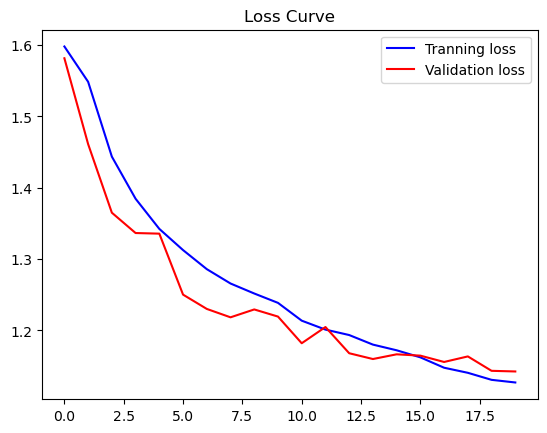

In [61]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range=range(epochs)
plt.plot(epochs_range, loss, 'b', label = 'Tranning loss')
plt.plot(epochs_range, val_loss, 'r', label = 'Validation loss')
plt.title('Loss Curve')
plt.legend()
plt.show()


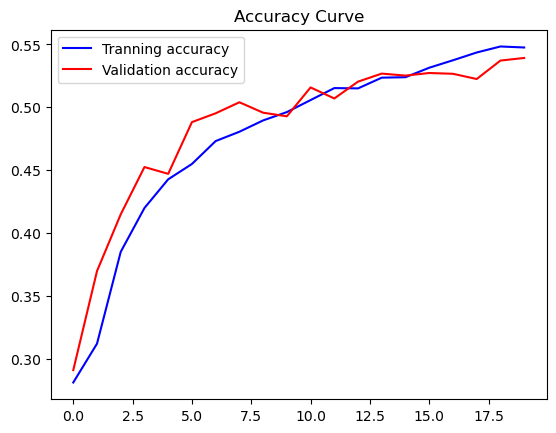

In [62]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(epochs_range, accuracy, 'b', label = 'Tranning accuracy')
plt.plot(epochs_range, val_accuracy, 'r', label = 'Validation accuracy')
plt.title('Accuracy Curve')
plt.legend()
plt.show()

In [92]:
predictions=[]
pred=model.predict(X_test)
for p in pred:
    predi=np.argmax(p)
    predictions.append(predi)
predictions

196/196 [==============================] - 3s 16ms/step


[4,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 1,
 0,
 3,
 3,
 3,
 2,
 3,
 4,
 4,
 3,
 2,
 4,
 3,
 2,
 2,
 3,
 2,
 4,
 3,
 1,
 2,
 1,
 3,
 4,
 3,
 3,
 2,
 3,
 3,
 3,
 2,
 1,
 1,
 2,
 2,
 3,
 0,
 0,
 4,
 4,
 4,
 1,
 3,
 3,
 3,
 2,
 2,
 3,
 0,
 1,
 2,
 0,
 2,
 2,
 1,
 2,
 3,
 4,
 3,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 3,
 1,
 0,
 2,
 3,
 3,
 4,
 2,
 3,
 1,
 2,
 3,
 3,
 2,
 4,
 4,
 4,
 4,
 1,
 3,
 1,
 2,
 4,
 1,
 3,
 1,
 2,
 4,
 4,
 4,
 3,
 1,
 2,
 1,
 1,
 3,
 4,
 1,
 3,
 2,
 3,
 3,
 3,
 1,
 2,
 1,
 3,
 2,
 0,
 3,
 3,
 4,
 3,
 0,
 4,
 3,
 0,
 2,
 2,
 0,
 3,
 2,
 3,
 4,
 1,
 4,
 2,
 0,
 3,
 3,
 2,
 2,
 3,
 4,
 1,
 4,
 3,
 2,
 3,
 4,
 3,
 2,
 2,
 2,
 3,
 2,
 0,
 3,
 4,
 1,
 3,
 3,
 2,
 3,
 3,
 2,
 2,
 2,
 2,
 4,
 2,
 3,
 4,
 2,
 3,
 2,
 4,
 4,
 4,
 2,
 3,
 2,
 2,
 3,
 2,
 3,
 3,
 1,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 4,
 4,
 4,
 4,
 4,
 2,
 1,
 2,
 3,
 4,
 4,
 2,
 3,
 2,
 2,
 2,
 4,
 3,
 3,
 3,
 2,
 4,
 2,
 0,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 0,
 4,
 4,
 3,
 2,
 0,
 4,
 1,
 4,
 3,
 0,
 2,
 2,
 2,


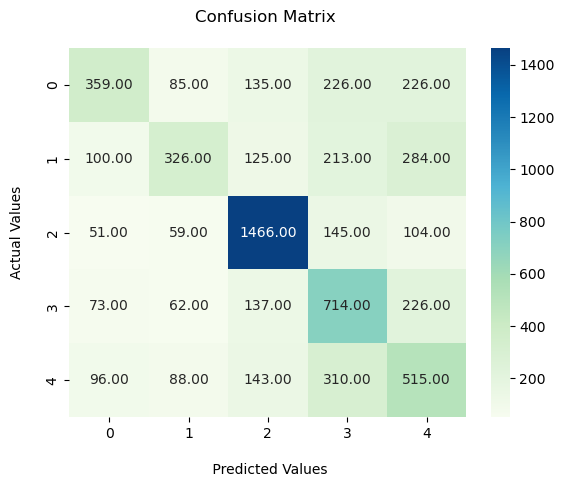

In [107]:
import seaborn as sns

fx=sns.heatmap(confusion_matrix(y_test,predictions), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
plt.show()


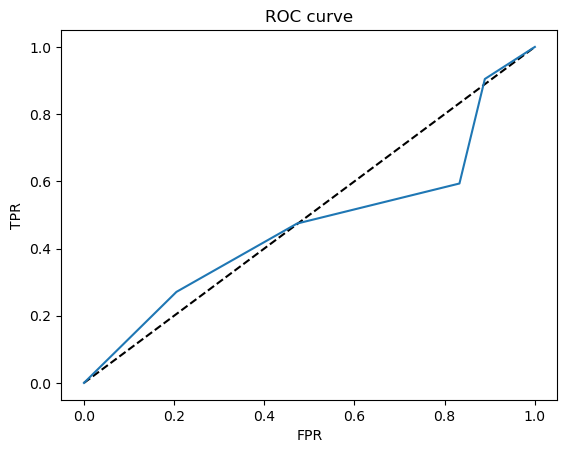

In [109]:
from sklearn.metrics import auc,roc_curve ,roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test,predictions ,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='CNN')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()


In [110]:
model.save('Emotion_recoginition.model')

INFO:tensorflow:Assets written to: Emotion_recoginition.model\assets


INFO:tensorflow:Assets written to: Emotion_recoginition.model\assets
